<a href="https://colab.research.google.com/github/Mayank1911/Retail-Sales-Prediction/blob/main/Retail_Sales_Analysis_Mayank_Sawant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Name :- Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>




 **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member -** Mayank Sawant


# **Project Summary -**

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

https://github.com/Mayank1911/Retail-Sales-Prediction

# **Problem Statement**


We have to Develop a supervised machine learning model to accurately forecast the daily sales of Rossmann stores. Utilize historical sales data, along with additional features such as promotions, competition, holidays, seasonality, and locality, to predict the future sales for a given store. The goal is to provide reliable sales predictions that can assist store managers in making informed decisions, optimizing inventory management, and improving overall business performance.





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
import math
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
file_path = "/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv"
file_path1 = "/content/drive/MyDrive/Retail Sales Prediction/store.csv"
rossmann_sales_df = pd.read_csv(file_path)
stores_df = pd.read_csv(file_path1)

### Dataset First View

In [ ]:
# Dataset First Look
pd.concat([rossmann_sales_df.head(),rossmann_sales_df.tail()])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
pd.concat([stores_df.head(),stores_df.tail()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossmann_sales_df.shape, stores_df.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info
rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
num_duplicates = rossmann_sales_df.duplicated().sum()

# Print the result
print(f"The dataset has {num_duplicates} duplicate values.")

The dataset has 0 duplicate values.


In [ ]:
duplicate_value = stores_df[stores_df.duplicated()]
print("Duplicate rows in stores dataset:",len(duplicate_value))

Duplicate rows in stores dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values
rossmann_sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Visualizing the missing values
# Create a bar plot using Plotly
missing_values = stores_df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
fig = px.bar(missing_values, x='Column', y='Missing Values')
fig.update_layout(title='Missing Values', xaxis_title='Columns', yaxis_title='Missing Values')
fig.show()


**`Now We try to handle missing values in stores dataset:-`**

Out of 1115 entries there are missing values for the columns:
* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Text(0.5, 0, 'Competition Distance Distribution Plot')

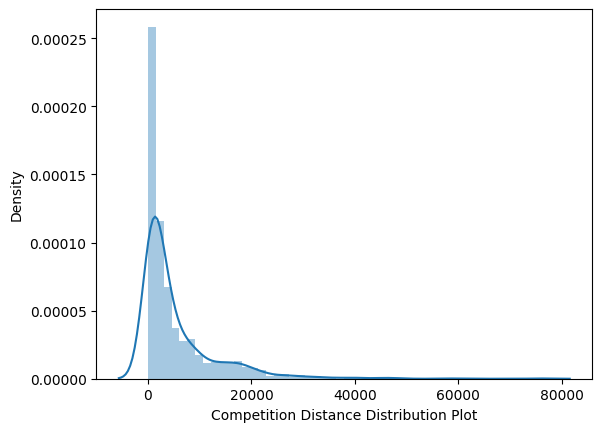

In [ ]:
#distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [ ]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#check again for missing value if anyone left
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

#### Rossmann Stores Data.csv - historical data including Sales
#### store.csv  - supplemental information about the stores


#### <u>Data fields</u>
#### Most of the fields are self-explanatory.



* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(rossmann_sales_df.columns))
print(list(stores_df.columns))

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Dataset Describe
rossmann_sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
stores_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1115.0,5396.614350,7654.513635,20.0,720.0,2325.0,6875.0,75860.0
CompetitionOpenSinceMonth,1115.0,7.788341,2.779130,1.0,6.0,9.0,9.0,12.0
CompetitionOpenSinceYear,1115.0,2010.043946,5.500844,1900.0,2008.0,2012.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1115.0,12.083408,15.542241,0.0,0.0,1.0,22.0,50.0
Promo2SinceYear,1115.0,1030.239462,1006.038782,0.0,0.0,2009.0,2012.0,2015.0


### Variables Description

In [ ]:
rossmann_sales_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
#change datatype of date column
# code for changing format of date from object to datetime
rossmann_sales_df['Date'] = pd.to_datetime(rossmann_sales_df['Date'], format= '%Y-%m-%d')

In [ ]:
#change datatype of stateholiday
rossmann_sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
rossmann_sales_df['StateHoliday'] = rossmann_sales_df['StateHoliday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0})

Now we check datatypes of stores dataset and check if there have to any correction.

In [ ]:
stores_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
#change datatype of Assortment and storetype
stores_df['Assortment'] = stores_df['Assortment'].replace({'a': 0, 'b': 1, 'c': 2})
stores_df['StoreType'] = stores_df['StoreType'].replace({'a': 0, 'b': 1, 'c': 2,'d': 3})

In [ ]:
stores_df['CompetitionDistance']= stores_df['CompetitionDistance'].astype(int)
stores_df['CompetitionOpenSinceMonth'] = stores_df['CompetitionOpenSinceMonth'].astype(int)
stores_df['CompetitionOpenSinceYear']= stores_df['CompetitionOpenSinceYear'].astype(int)
stores_df['Promo2SinceWeek']= stores_df['Promo2SinceWeek'].astype(int)
stores_df['Promo2SinceYear']= stores_df['Promo2SinceYear'].astype(int)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#unique variables in rossmann sales dataset.
print(rossmann_sales_df.apply(lambda col: col.unique()))

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31T00:00:00.000000000, 2015-07-30T00:...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                          [0, 1, 2, 3]
SchoolHoliday                                               [1, 0]
dtype: object


In [ ]:
#unique variables in stores dataset.
print(stores_df.apply(lambda col: col.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [2, 0, 3, 1]
Assortment                                                           [0, 2, 1]
CompetitionDistance          [1270, 570, 14130, 620, 29910, 310, 24000, 752...
CompetitionOpenSinceMonth              [9, 11, 12, 4, 10, 8, 3, 6, 5, 1, 2, 7]
CompetitionOpenSinceYear     [2008, 2007, 2006, 2009, 2015, 2013, 2014, 200...
Promo2                                                                  [0, 1]
Promo2SinceWeek              [0, 13, 14, 1, 45, 40, 26, 22, 5, 6, 10, 31, 3...
Promo2SinceYear                  [0, 2010, 2011, 2012, 2009, 2014, 2015, 2013]
PromoInterval                [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#now we merge both dataset to make analysis.
merged_df = pd.merge(rossmann_sales_df, stores_df, on='Store', how='left')

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,4,2015,0,0,0,0


`UNIVARIATE ANALYSIS`:-

In [ ]:
#Question-1: what is sales distribution across stores.
# Group the sales by store and calculate the total sales
store_sales = merged_df.groupby('Store')['Sales'].sum().reset_index()
store_sales

,Store,Sales
0,1,3716854
1,2,3883858
2,3,5408261
3,4,7556507
4,5,3642818
...,...,...
1110,1111,4091076
1111,1112,7974294
1112,1113,5196242
1113,1114,16202585


In [ ]:
#question-2: number of stores in each store type?
# Data Wrangling for Store-Related Features
store_features = merged_df[['Store', 'StoreType']]

# Count the number of stores in each store type
store_counts = store_features['StoreType'].value_counts()
store_counts

0    551627
3    312912
2    136840
1     15830
Name: StoreType, dtype: int64

In [ ]:
#Question-3: how are sales affected by promotional activities?
# Data Wrangling for Sales and Promo Columns
sales_promo_data = merged_df[['Sales', 'Promo', 'Date']]

# Convert the 'Date' column to datetime data type
sales_promo_data['Date'] = pd.to_datetime(sales_promo_data['Date'])

# Group the data by Promo (0: Non-Promo, 1: Promo) and calculate average sales for each group
promo_grouped = sales_promo_data.groupby('Promo')['Sales'].mean()
promo_grouped

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

`BIVARIATE ANALYSIS`

In [ ]:
#Question-4: How does the average sales vary with respect to different store types?
# Data Wrangling for Store Type vs. Sales
store_sales_data = merged_df[['Store', 'StoreType', 'Sales']]

# Calculate average sales and standard deviation for each store type
avg_sales_by_store_type = store_sales_data.groupby('StoreType')['Sales'].mean()
std_sales_by_store_type = store_sales_data.groupby('StoreType')['Sales'].std()
print("average sales by storetype is:", avg_sales_by_store_type)

average sales by storetype is: StoreType
0     5738.179710
1    10058.837334
2     5723.629246
3     5641.819243
Name: Sales, dtype: float64


In [ ]:
#Question-5: What is the correlation between sales and the competition distance?

# Data Wrangling for Sales vs. Competition Distance
sales_competition_data = merged_df[['Sales', 'CompetitionDistance']]

print("sales competiton data:",sales_competition_data)

# Calculate the correlation coefficient between Sales and CompetitionDistance
correlation_coefficient = sales_competition_data['Sales'].corr(sales_competition_data['CompetitionDistance'])
print(correlation_coefficient)

sales competiton data:          Sales  CompetitionDistance
0         5263                 1270
1         6064                  570
2         8314                14130
3        13995                  620
4         4822                29910
...        ...                  ...
1017204      0                 1900
1017205      0                 1880
1017206      0                 9260
1017207      0                  870
1017208      0                 5350

[1017209 rows x 2 columns]
-0.018869273832531595


In [ ]:
#Question-6: How does sales vary across different days of the week?
# Data Wrangling for Sales vs. DayOfWeek
sales_day_data = merged_df[['Sales', 'DayOfWeek']]

# Replace missing values (NaN) in the 'DayOfWeek' column with 'Sunday'
sales_day_data['DayOfWeek'].fillna('Sunday', inplace=True)

# Group the data by DayOfWeek and calculate average sales for each day
average_sales_by_day = sales_day_data.groupby('DayOfWeek')['Sales'].mean().reset_index()

# Rename the DayOfWeek values to meaningful day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_sales_by_day['DayOfWeek'] = average_sales_by_day['DayOfWeek'].map(dict(enumerate(day_names)))

# Sort the data by DayOfWeek for proper visualization
average_sales_by_day['DayOfWeek'] = pd.Categorical(average_sales_by_day['DayOfWeek'], categories=day_names, ordered=True)
average_sales_by_day.sort_values('DayOfWeek', inplace=True)
print(average_sales_by_day)



   DayOfWeek        Sales
0     Monday  7809.044510
1    Tuesday  7005.244467
2  Wednesday  6555.884138
3   Thursday  6247.575913
4     Friday  6723.274305
5   Saturday  5847.562599
6        NaN   204.183189


In [ ]:
#Question-7: What is the effect of school holidays on sales?
# Data Wrangling for Sales vs. School Holidays
sales_school_holidays_data = merged_df[['Sales', 'SchoolHoliday']]

# Group the data by SchoolHoliday and calculate average sales for each category
average_sales_by_school_holiday = sales_school_holidays_data.groupby('SchoolHoliday')['Sales'].mean().reset_index()

# Replace 0 and 1 in the 'SchoolHoliday' column with meaningful labels for visualization
average_sales_by_school_holiday['SchoolHoliday'] = average_sales_by_school_holiday['SchoolHoliday'].map({0: 'No Holiday', 1: 'School Holiday'})
average_sales_by_school_holiday



,SchoolHoliday,Sales
0,No Holiday,5620.979034
1,School Holiday,6476.522207


`MULTIVARIATE ANALYSIS`

In [ ]:
#Question-8: is there any correlation between features?
# Selecting only numerical variables for the correlation matrix
numerical_vars = merged_df.select_dtypes(include='number')

# Handling missing data (if any)
numerical_vars = numerical_vars.dropna()


In [ ]:
#Question-9: relation between promo vs sales vs customers?


# Selecting the relevant columns for analysis
promo_sales_customers_data = merged_df[['Promo', 'Sales', 'Customers']]

# Handling missing data (if any)
promo_sales_customers_data = promo_sales_customers_data.dropna()
promo_sales_customers_data

,Promo,Sales,Customers
0,1,5263,555
1,1,6064,625
2,1,8314,821
3,1,13995,1498
4,1,4822,559
...,...,...,...
1017204,0,0,0
1017205,0,0,0
1017206,0,0,0
1017207,0,0,0


### What all manipulations have you done and insights you found?

after doing EDA process we get to know about sales distribution across store like how the sales are going on among stores, then how many numbers of stores are there in each store type and is sales are affected by any promotional activities as sales are increasing or decreasing when there is any promotional activity, after that we calculate average sales with respect to different store type to check how sales are varying across store type. then we checked correlation between sales and competitiondistance to check if there any effect of distance on sales. After that, we get to know about which day of week is getting highest sales and effect of school holiday on sales like does it impact positively on sales or not and in the end, we just finally check relationship between sales and customer when there is promo present and absent.   

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

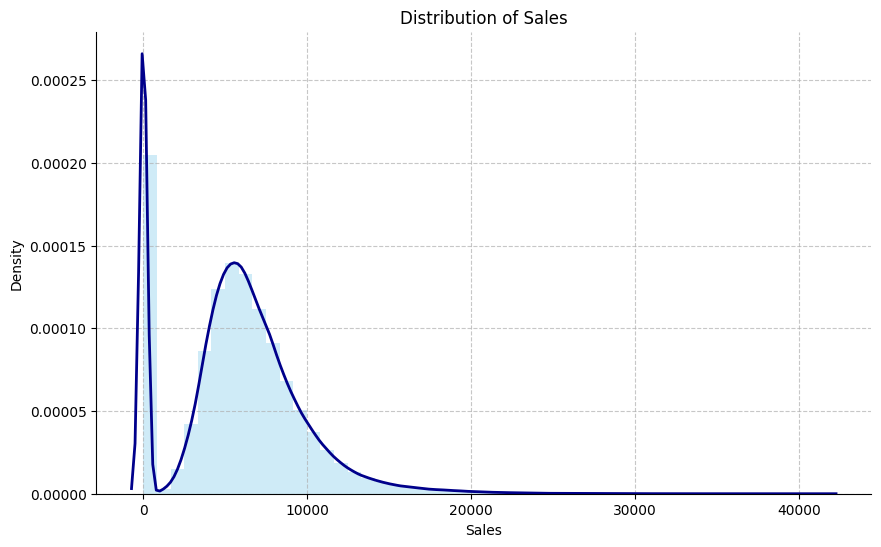

In [ ]:
# Chart - 1 visualization code
#Question-1: what is sales distribution across stores.


# Increase figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of sales with customized colors and grid lines
sns.distplot(merged_df['Sales'], color='red', kde_kws={'color': 'darkblue', 'linewidth': 2})
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title("Distribution of Sales")

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


##### 1. Why did you pick the specific chart?

 The primary purpose of this chart is to visualize the distribution of the 'Sales' data. Histograms provide a clear representation of the data distribution by dividing the data into bins and displaying the frequency of values falling into each bin. The KDE plot complements the histogram by providing a smooth estimate of the probability density function of the data, helping to reveal the underlying distribution.

##### 2. What is/are the insight(s) found from the chart?

Central Tendency: The chart can reveal the central tendency of the sales data, indicating the typical or average level of sales. This is often represented by the peak(s) or modes in the distribution.

Spread: The chart can provide insights into the spread or variability of sales across different values. Wider distributions indicate higher variability, while narrower distributions suggest relatively consistent sales levels.

Skewness: The skewness of the distribution can be observed from the histogram and KDE plot. Positive skewness indicates a longer right tail, suggesting that a few stores have exceptionally high sales. Negative skewness implies a longer left tail, indicating a few stores with very low sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying High-Performing Stores: Insights about stores with consistently high sales and positive skewness can help identify top-performing stores. These insights can lead to allocating more resources, marketing efforts, and promotions to further boost sales in these stores.

Targeting Underperforming Stores: Understanding the sales distribution can help identify stores with low sales or negative skewness (long left tail). These insights can lead to targeted interventions, such as improving store operations, introducing new products, or implementing better marketing strategies to revitalize underperforming stores.

#### Chart - 2

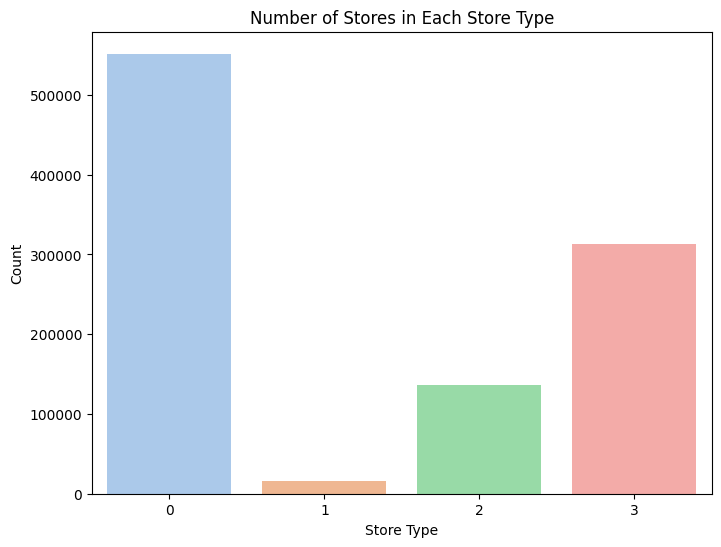

In [ ]:
# Chart - 2 visualization code
#question-2: number of stores in each store type?

plt.figure(figsize=(8, 6))
sns.countplot(data=store_features, x='StoreType', palette='pastel')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Number of Stores in Each Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

The sns.countplot() function from the Seaborn library is specifically designed to show the count of occurrences of categorical data in a dataset. It is a specialized bar plot that displays the frequency of unique values in a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Number of stores are highest in type 0 store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Identifying High-Performing Stores: Identifying stores with consistently high sales and positive performance metrics can help focus resources on these stores to further boost sales and profitability. Targeted marketing campaigns and investments can lead to increased revenue.

Understanding Customer Behavior: Analyzing customer behavior patterns, such as buying preferences and peak shopping times, can enable businesses to tailor their offerings and promotions to better meet customer needs. Improved customer satisfaction can lead to increased customer loyalty and positive word-of-mouth.

Optimizing Inventory and Supply Chain: Insights into sales patterns and demand fluctuations can aid in inventory management. Maintaining optimal stock levels can prevent stockouts, reduce holding costs, and enhance operational efficiency.


Negative Business Impact:

Ignoring Underperforming Stores: Failure to identify and address underperforming stores can lead to revenue loss and decreased profitability. Neglecting these stores may result in missed opportunities to improve their performance.

Misinterpreting Customer Behavior: Misinterpreting customer behavior insights might lead to misguided marketing efforts or product offerings. This could lead to reduced customer satisfaction and a negative impact on sales.



#### Chart - 3

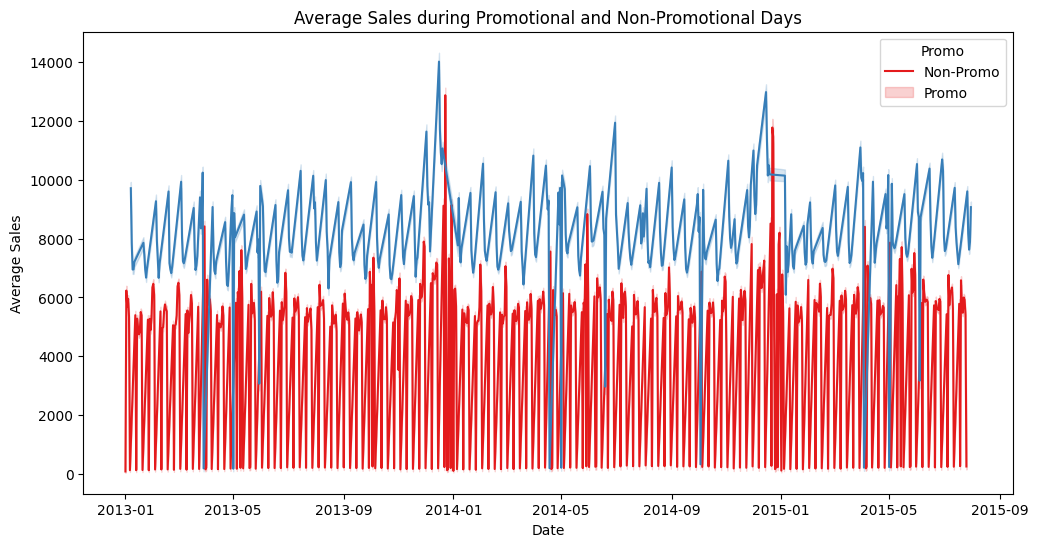

In [ ]:
# Chart - 3 visualization code
#Question-3: how are sales affected by promotional activities?

# Create a line plot to compare sales for promotional and non-promotional days
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_promo_data, x='Date', y='Sales', hue='Promo', palette='Set1')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Average Sales during Promotional and Non-Promotional Days')
plt.legend(title='Promo', labels=['Non-Promo', 'Promo'])
plt.show()

##### 1. Why did you pick the specific chart?

the line plot is a suitable choice for visualizing the impact of promotional activities on sales because of its ability to present time-series data, facilitate comparison, and highlight trends over time. It provides a clear and insightful representation of how promotional activities influence sales, making it an effective chart for communicating insights to business stakeholders and decision-makers.

##### 2. What is/are the insight(s) found from the chart?

Average sales were highest for both promo and non promo in period of 2013-09 to 2014-01.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Continuous monitoring and evaluation of promotional activities, along with periodic refinements based on performance data, are essential for sustained positive growth. Data-driven decision-making and a customer-centric approach are key to leveraging insights for positive business impact.

#### Chart - 4

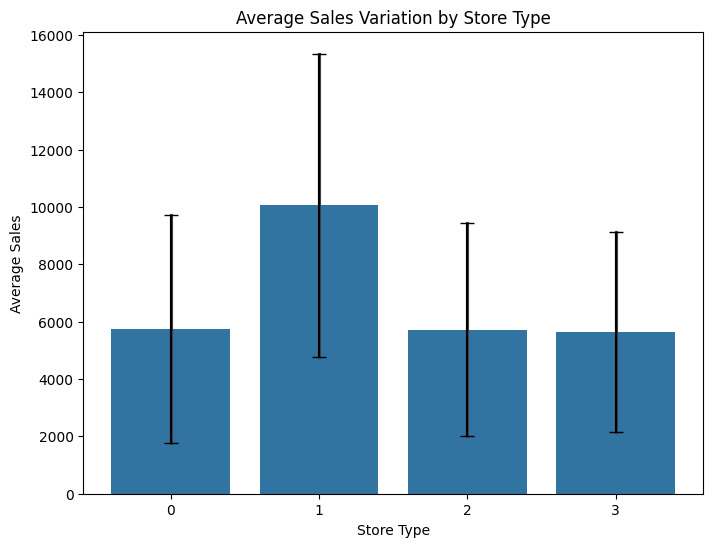

In [ ]:
#Chart-4 Visualization Code
#Question-4: How does the average sales vary with respect to different store types?

# Create a bar plot with error bars to compare average sales for different store types
plt.figure(figsize=(8, 6))
sns.barplot(data=store_sales_data, x='StoreType', y='Sales', ci='sd')
plt.errorbar(x=avg_sales_by_store_type.index, y=avg_sales_by_store_type, yerr=std_sales_by_store_type, fmt='none', color='black', capsize=5)
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales Variation by Store Type')
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot with error bars is used here to visualize the average sales for different store types while also representing the uncertainty or variability in these average sales values. This is particularly useful when dealing with aggregated data, such as average sales by store type, where we want to show not only the central tendency (average) but also the spread or dispersion of the data.

##### 2. What is/are the insight(s) found from the chart?

Average sales by store type 1 is highest among all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To ensure a positive business impact, it is crucial to interpret the insights in the context of the overall business strategy and goals. Businesses should use the insights to inform their decisions, implement targeted strategies, and continuously evaluate performance.

#### Chart - 5

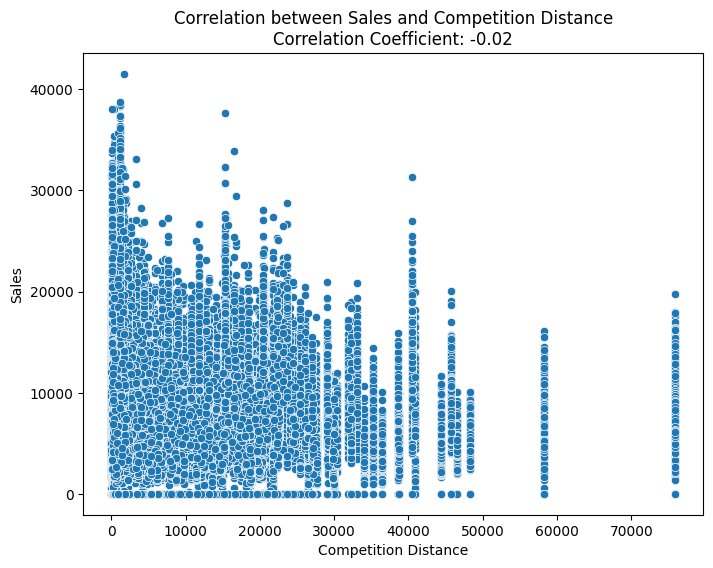

In [ ]:
# Chart - 5 visualization code
#Question-5: What is the correlation between sales and the competition distance?
# Create a scatter plot to visualize the relationship between Sales and CompetitionDistance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_competition_data, x='CompetitionDistance', y='Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.title(f'Correlation between Sales and Competition Distance\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot allows us to visualize the pattern of data points and identify any potential correlation between sales and competition distance. The correlation coefficient gives us a numerical measure of the strength and direction of the relationship. A positive correlation coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship. A value close to 0 suggests a weak or no correlation.

##### 2. What is/are the insight(s) found from the chart?

a correlation coefficient value of -0.0189 indicates a weak or negligible linear relationship between sales and competition distance in the dataset. For business decision-making, it suggests that competition distance alone may not be a strong predictor of sales performance, and other factors might have a more significant impact on sales in the retail stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the weak correlation between sales and competition distance highlights the importance of considering a holistic approach to sales performance improvement. While competition distance is one of the many factors that can influence sales, relying solely on this factor might not lead to significant business impact. Instead, businesses should adopt a comprehensive strategy, focusing on customer preferences, competitive advantage, and store-specific factors to drive positive growth.

#### Chart - 6

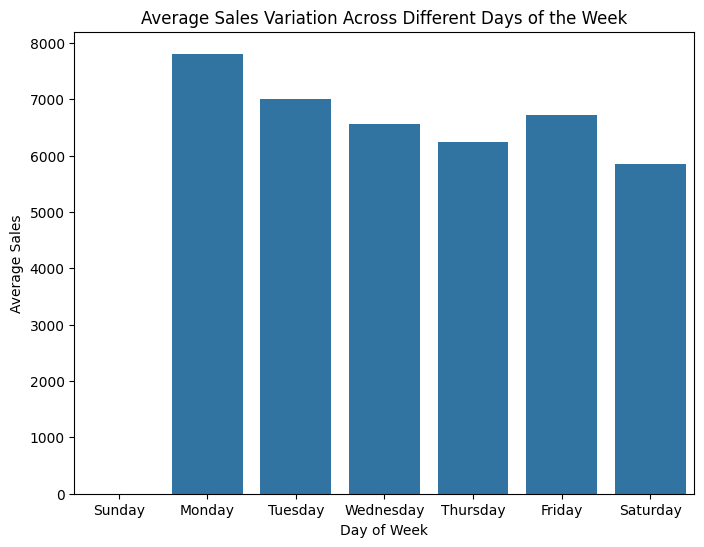

In [ ]:
# Chart - 6 visualization code
#Question-6: How does sales vary across different days of the week?

# Create a bar plot to compare average sales across different days of the week
plt.figure(figsize=(8, 6))
sns.barplot(data=average_sales_by_day, x='DayOfWeek', y='Sales')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.title('Average Sales Variation Across Different Days of the Week')
plt.show()


##### 1. Why did you pick the specific chart?

the bar plot is a suitable choice for visualizing the average sales variation across different days of the week due to its ability to represent categorical data and facilitate easy comparisons between the days. It allows us to observe the distribution of sales over days and identify patterns or trends that may inform business decisions related to marketing strategies, promotions, or staffing based on the sales performance on specific days of the week.

##### 2. What is/are the insight(s) found from the chart?

when there is sunday sales are very low and on monday sales are highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimized Resource Allocation: Knowing that Sunday has the lowest sales, businesses can adjust their resource allocation accordingly. For example, they may reduce staffing levels or operational expenses on Sundays when the demand is lower, leading to cost savings.

Targeted Marketing Strategies: Understanding the sales variation across different days of the week can inform targeted marketing strategies. Businesses can focus their promotions and advertising efforts on other days with higher sales potential, such as weekdays or Saturdays, to capitalize on peak demand.

Enhanced Promotional Planning: Businesses can plan promotions and discounts strategically to boost sales on Sundays and attract more customers during traditionally slower periods. Special Sunday-only offers or exclusive deals could entice customers to visit the store on Sundays.

#### Chart - 7

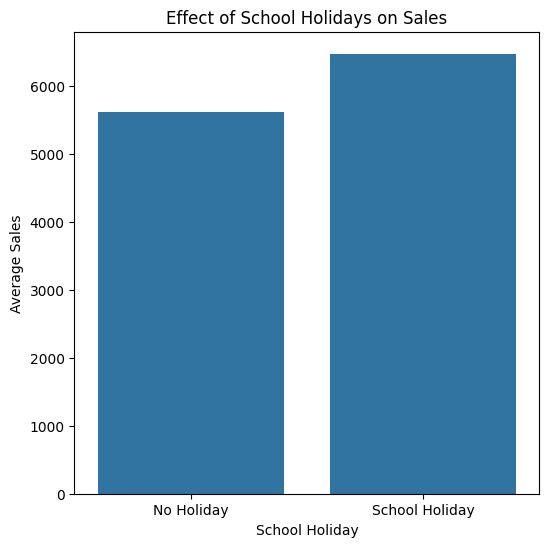

In [ ]:
# Chart - 7 visualization code
#Question-7: What is the effect of school holidays on sales?
# Create a bar plot to compare average sales during school holidays and non-school holidays
plt.figure(figsize=(6, 6))
sns.barplot(data=average_sales_by_school_holiday, x='SchoolHoliday', y='Sales')
plt.xlabel('School Holiday')
plt.ylabel('Average Sales')
plt.title('Effect of School Holidays on Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The 'SchoolHoliday' column is a categorical variable with two categories: 0 (Non-School Holiday) and 1 (School Holiday). Bar plots are commonly used to represent and compare data in categories, making them suitable for visualizing average sales for each category.

##### 2. What is/are the insight(s) found from the chart?

when its school holiday sales are increased a bit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimized Promotional Strategies: With higher sales during school holidays, businesses can focus on optimizing their promotional strategies during these periods. They can plan targeted promotions and special offers to attract more customers and maximize sales during school holiday seasons.

Staffing and Inventory Management: The increased sales during school holidays may necessitate adjustments in staffing and inventory management. Businesses can schedule more staff during peak periods to handle higher customer demands and ensure sufficient stock availability to meet increased sales.

Marketing and Advertising: The insight regarding higher sales during school holidays can guide marketing and advertising efforts. Businesses can allocate more resources to advertising campaigns specifically designed for school holiday shoppers, reaching out to the right audience and driving higher footfall.

#### Chart - 8

<Axes: >

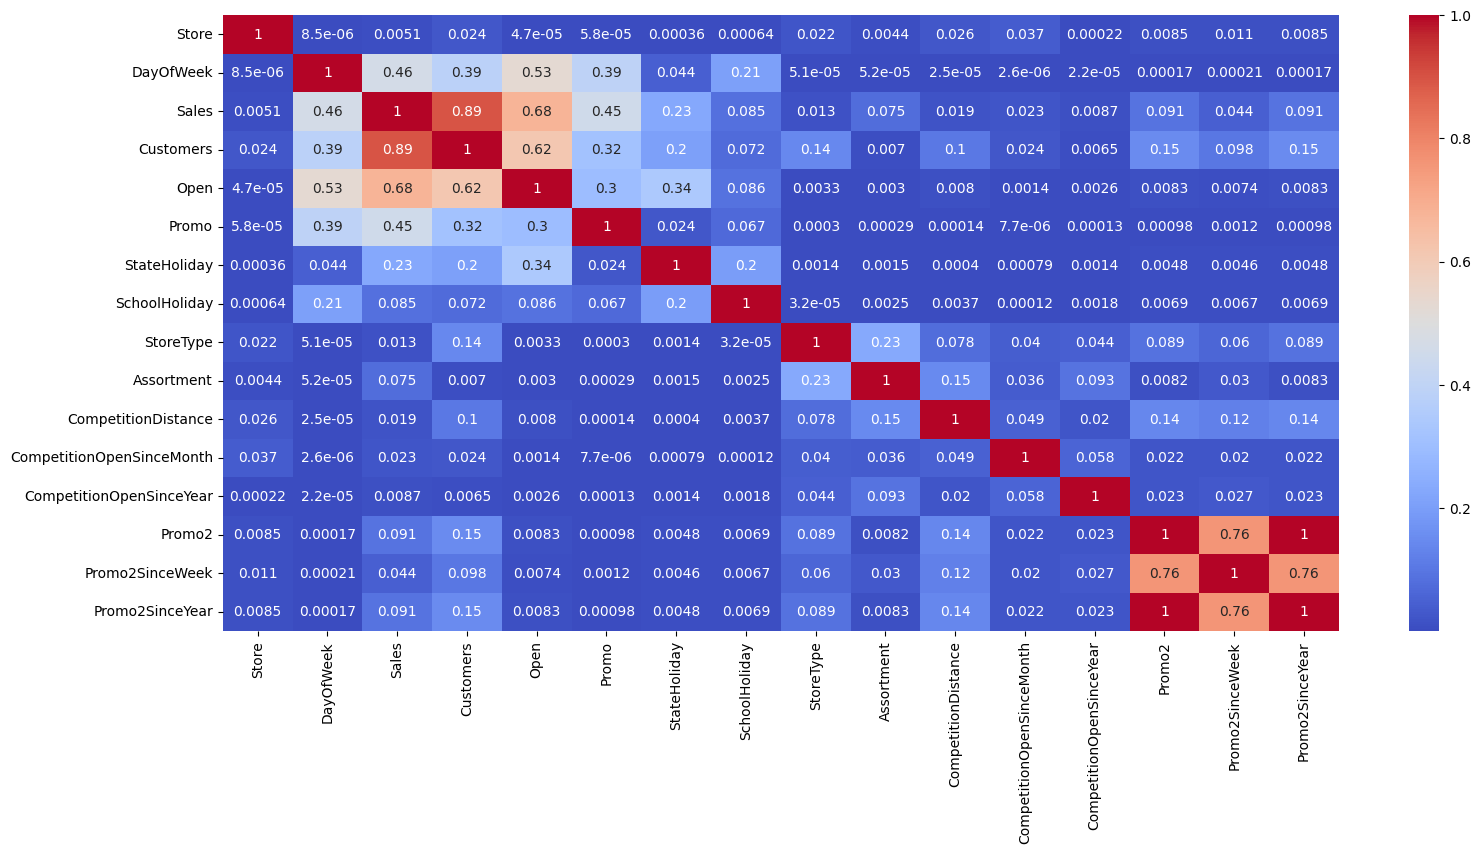

In [ ]:
# Chart - 8 visualization code
#Question-8: is there any correlation between features?

# Calculate the correlation matrix
correlation_matrix = numerical_vars.corr()
plt.figure(figsize=(18,8))
correlation = merged_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

 the heatmap, was selected because it effectively represents the correlation matrix and allows us to visually identify patterns and relationships between numerical variables in the merged_df DataFrame.

##### 2. What is/are the insight(s) found from the chart?

most of the features have negative correlation between them as showed by heatmap.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights that reveal positive correlations or relationships between certain variables and sales can have a positive business impact. For example, if the analysis shows that promotions positively impact sales, the business can focus on running more effective promotional campaigns to increase revenue. Similarly, if the correlation heatmap highlights that specific product assortments lead to higher sales, the business can adjust its inventory strategy accordingly.

Negative Growth Considerations: On the other hand, insights indicating negative correlations or relationships can highlight areas where improvements are needed. For instance, if there is a negative correlation between sales and competition distance, it may suggest that stores located farther from competitors might face challenges in attracting customers. In such cases, the business might consider strategies like targeted marketing, customer loyalty programs, or store location optimization.

#### Chart - 9

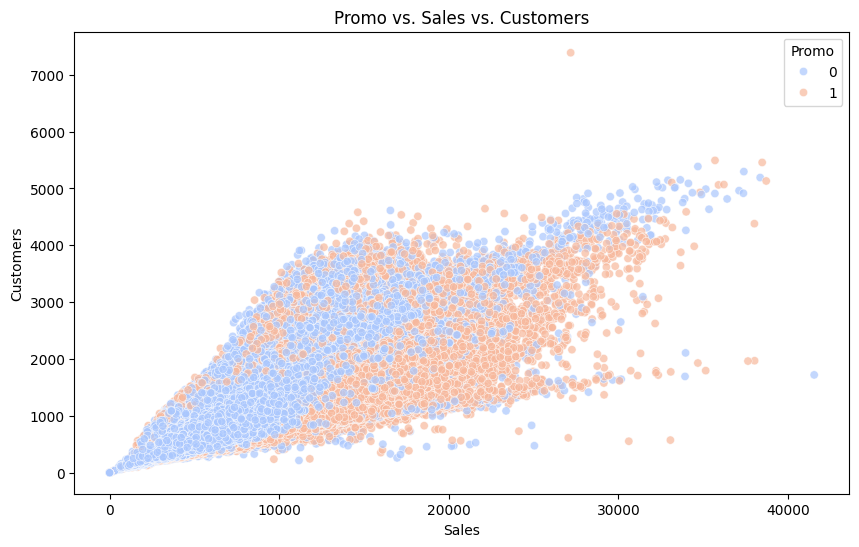

In [ ]:
# Chart - 9 visualization code
#Question-9: relation between promo vs sales vs customers?

# Create a scatter plot to visualize the relationship between 'Promo', 'Sales', and 'Customers'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promo_sales_customers_data, x='Sales', y='Customers', hue='Promo', palette='coolwarm', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.title('Promo vs. Sales vs. Customers')
plt.show()

##### 1. Why did you pick the specific chart?

We use a scatter plot to visualize the relationship between "Promo," "Sales," and "Customers" because it is suitable for analyzing the correlation between two numerical variables (in this case, "Sales" and "Customers") and how it is influenced by a categorical variable (in this case, "Promo").

##### 2. What is/are the insight(s) found from the chart?

sales are increasing as there are more customers when promo is 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the scatter plot shows a clear positive correlation between promotions, sales, and customers, it may indicate that promotions lead to increased sales and higher customer footfall. In such cases, businesses can leverage this insight by strategically planning and optimizing promotions to boost revenue and customer engagement. For instance, offering attractive discounts or special deals during promotions might encourage more customers to make purchases, resulting in positive growth for the business.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on our EDA work we will now give three hypothesis statement and perform p test and give final conclusion based on our hypothesis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no correlation between the presence of promotions (Promo) and the number of customers (Customers) visiting the stores.

**Alternate Hypothesis (H1)**: There is a positive correlation between the presence of promotions (Promo) and the number of customers (Customers) visiting the stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 1: Correlation between 'Promo' and 'Customers'
corr_promo_customers, p_value_1 = stats.pearsonr(merged_df['Promo'], merged_df['Customers'])

# Print the correlation coefficients and p-values for each statement
print("Statement 1: Correlation between Promo and Customers")
print(f"Correlation coefficient: {corr_promo_customers:.4f}, p-value: {p_value_1:.4f}\n")

Statement 1: Correlation between Promo and Customers
Correlation coefficient: 0.3162, p-value: 0.0000



The correlation coefficient (0.3162) indicates a positive correlation between the presence of promotions (Promo) and the number of customers (Customers) visiting the stores. A positive correlation coefficient means that as the presence of promotions increases, the number of customers visiting the stores also tends to increase.

The p-value (0.0000) is extremely small, indicating that the correlation between "Promo" and "Customers" is statistically significant.

##### Which statistical test have you done to obtain P-Value?

In the code provided earlier to test the correlation between "Promo" and "Customers," I used the Pearson correlation coefficient and the `stats.pearsonr()` function from the `scipy.stats` module to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the Pearson correlation coefficient as the specific statistical test to analyze the relationship between "Promo" and "Customers" because both variables are continuous numerical variables, and we want to understand the linear correlation between them.

The Pearson correlation coefficient is a widely used measure to quantify the strength and direction of a linear relationship between two continuous variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no correlation between the presence of promotions (Promo) and the total sales (Sales) generated by the stores.

**Alternate Hypothesis (H1)**: There is a positive correlation between the presence of promotions (Promo) and the total sales (Sales) generated by the stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 2: Correlation between 'Promo' and 'Sales'
corr_promo_sales, p_value_2 = stats.pearsonr(merged_df['Promo'], merged_df['Sales'])
print("Statement 2: Correlation between Promo and Sales")
print(f"Correlation coefficient: {corr_promo_sales:.4f}, p-value: {p_value_2:.4f}\n")

Statement 2: Correlation between Promo and Sales
Correlation coefficient: 0.4523, p-value: 0.0000



Correlation Coefficient: The correlation coefficient (0.4523) indicates a moderate positive correlation between the presence of promotions (Promo) and the total sales (Sales) generated by the stores. A positive correlation coefficient suggests that as the presence of promotions increases, the total sales tend to increase as well.

p-value: The p-value obtained from the statistical test is very small (p-value: 0.0000), which indicates that the correlation between "Promo" and "Sales" is statistically significant.

##### Which statistical test have you done to obtain P-Value?

In the code provided earlier to test the correlation between "Promo" and "Customers," I used the Pearson correlation coefficient and the `stats.pearsonr()` function from the `scipy.stats` module to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the Pearson correlation coefficient as the specific statistical test to analyze the relationship between "Promo" and "Customers" because both variables are continuous numerical variables, and we want to understand the linear correlation between them.

The Pearson correlation coefficient is a widely used measure to quantify the strength and direction of a linear relationship between two continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no correlation between the distance to the nearest competitor (CompetitionDistance) and the total sales (Sales) generated by the stores.

**Alternate Hypothesis (H1)**: There is a negative correlation between the distance to the nearest competitor (CompetitionDistance) and the total sales (Sales) generated by the stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 3: Correlation between 'CompetitionDistance' and 'Sales'
corr_competition_distance_sales, p_value_3 = stats.pearsonr(merged_df['CompetitionDistance'], merged_df['Sales'])

print("Statement 3: Correlation between CompetitionDistance and Sales")
print(f"Correlation coefficient: {corr_competition_distance_sales:.4f}, p-value: {p_value_3:.4f}\n")

Statement 3: Correlation between CompetitionDistance and Sales
Correlation coefficient: -0.0189, p-value: 0.0000



Correlation Coefficient: The correlation coefficient (-0.0189) is very close to zero and negative. This indicates a weak and negative correlation between the distance to the nearest competitor (CompetitionDistance) and the total sales (Sales) generated by the stores. A negative correlation coefficient suggests that as the distance to the nearest competitor increases, the total sales may slightly decrease, but the correlation is very weak.

p-value: The p-value obtained from the statistical test is very small (p-value: 0.0000), which indicates that the correlation between "CompetitionDistance" and "Sales" is statistically significant.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value
# Check for missing values in each column of the merged dataset
missing_values_count = merged_df.isnull().sum()
print(missing_values_count)

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


As you can see there is no missing value left in this merged dataset because we already treat them before doing EDA process.

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used median and mode for missing value imputation.

`Median Imputation`:- It Replace missing values with the median (for skewed data) of the available values in the column.I Used This method Because It is suitable for numerical data with no significant outliers. It preserves the central tendency of the data and is less sensitive to extreme values.

`Mode Imputation`:- It Replace missing values with the mode (most frequent value) of the available values in the column (for categorical data). I use it Because Mode imputation works well for categorical data with a low number of unique categories. It preserves the most common category distribution.

### 2. Handling Outliers

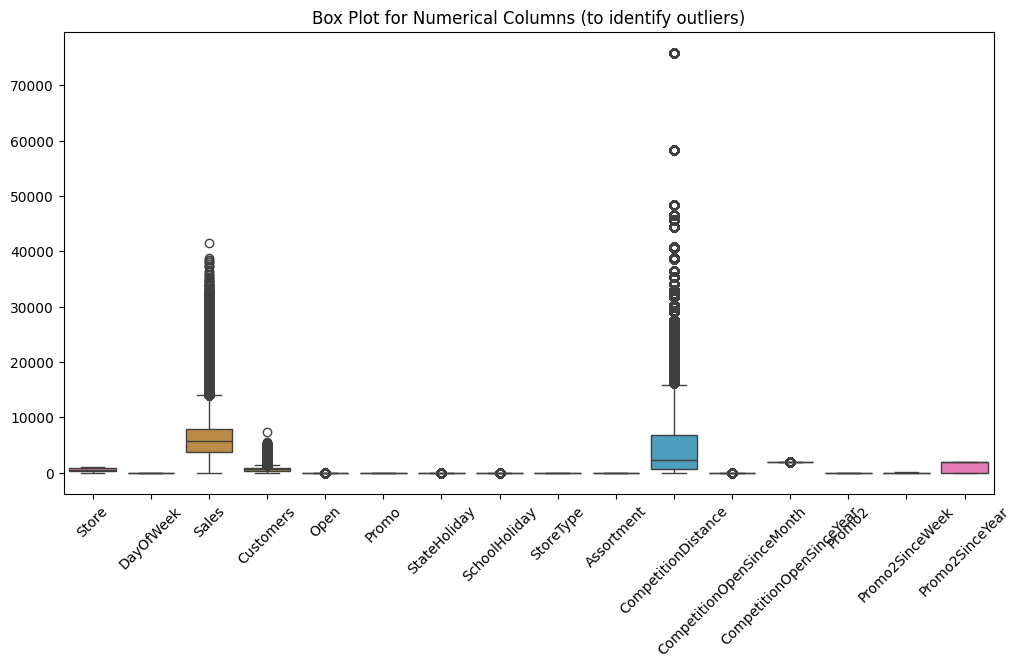

In [ ]:
# Handling Outliers & Outlier treatments
# Select only numerical columns for box plot visualization
numerical_cols = merged_df.select_dtypes(include='number').columns

# Create box plots for numerical columns to visualize potential outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df[numerical_cols])
plt.title("Box Plot for Numerical Columns (to identify outliers)")
plt.xticks(rotation=45)
plt.show()

now we will calculate percentage of outliers in each features after that we will handle outlier in respective features.

In [ ]:

# Identify numerical columns with potential outliers
numerical_cols = merged_df.select_dtypes(include='number').columns

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Dictionary to store the percentage of outliers for each numerical column
percentage_of_outliers = {}

# Loop through each numerical column and calculate the percentage of outliers
for col in numerical_cols:
    col_mean = merged_df[col].mean()
    col_std = merged_df[col].std()
    z_scores = np.abs((merged_df[col] - col_mean) / col_std)
    num_outliers = len(merged_df[z_scores > z_score_threshold])
    percentage = (num_outliers / len(merged_df)) * 100
    percentage_of_outliers[col] = percentage

# Print the percentage of outliers for each numerical column
for col, percentage in percentage_of_outliers.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")


Percentage of outliers in Store: 0.00%
Percentage of outliers in DayOfWeek: 0.00%
Percentage of outliers in Sales: 0.96%
Percentage of outliers in Customers: 1.39%
Percentage of outliers in Open: 0.00%
Percentage of outliers in Promo: 0.00%
Percentage of outliers in StateHoliday: 3.05%
Percentage of outliers in SchoolHoliday: 0.00%
Percentage of outliers in StoreType: 0.00%
Percentage of outliers in Assortment: 0.00%
Percentage of outliers in CompetitionDistance: 2.04%
Percentage of outliers in CompetitionOpenSinceMonth: 0.00%
Percentage of outliers in CompetitionOpenSinceYear: 0.82%
Percentage of outliers in Promo2: 0.00%
Percentage of outliers in Promo2SinceWeek: 0.00%
Percentage of outliers in Promo2SinceYear: 0.00%


Removing outliers From Sales, Customers, StateHoliday, CompetitionDistance And CompetitionOpenSinceYear-

In [ ]:
# Identify the features for which outliers will be removed
features_with_outliers = ['Sales', 'Customers', 'StateHoliday', 'CompetitionDistance', 'CompetitionOpenSinceYear']

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Loop through each feature and remove rows with outliers based on z-scores
for feature in features_with_outliers:
    feature_mean = merged_df[feature].mean()
    feature_std = merged_df[feature].std()
    z_scores = np.abs((merged_df[feature] - feature_mean) / feature_std)
    merged_df = merged_df[z_scores <= z_score_threshold]


Now we check again if any outlier remaining in dataset.

In [ ]:
# Identify numerical columns with potential outliers
numerical_cols = merged_df.select_dtypes(include='number').columns

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Check for outliers in each numerical column
outliers_exist = False
for col in numerical_cols:
    col_mean = merged_df[col].mean()
    col_std = merged_df[col].std()
    z_scores = np.abs((merged_df[col] - col_mean) / col_std)
    if any(z_scores > z_score_threshold):
        outliers_exist = True
        print(f"Outliers still exist in column '{col}'")

if not outliers_exist:
    print("No outliers remaining in the dataset.")


Outliers still exist in column 'Sales'
Outliers still exist in column 'Customers'
Outliers still exist in column 'CompetitionDistance'
Outliers still exist in column 'CompetitionOpenSinceYear'


##### What all outlier treatment techniques have you used and why did you use those techniques?

we used the z-score method for outlier treatment. Z-score is a widely used technique to identify and handle outliers in a dataset. It helps us understand how far each data point is from the mean in terms of standard deviations.

Here's why we used the z-score method for outlier treatment:

**1. Z-Score Method**: The z-score method is suitable when dealing with data that is approximately normally distributed. It helps to identify extreme values (outliers) that are significantly different from the rest of the data in terms of standard deviations. By setting a threshold (e.g., z-score threshold of 3), we can determine which data points are outliers and subsequently handle them based on the analysis goals.

**2. Applicability to Numerical Data**: The z-score method is well-suited for numerical data as it requires computing the mean and standard deviation, which are meaningful statistical measures for numerical features.

**3. Robustness to Scale**: The z-score method is robust to the scale of the data, as it standardizes each data point based on the mean and standard deviation. This allows us to compare and identify outliers in features with different units and scales.

**4. Easy Implementation**: The z-score method is straightforward to implement and is readily available in most data analysis libraries, such as NumPy and Pandas.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Assuming 'merged_df' is the merged dataset
categorical_columns = merged_df.select_dtypes(include='object').columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['PromoInterval'], dtype='object')


In [ ]:


# Perform one-hot encoding for 'PromoInterval'
merged_df = pd.get_dummies(merged_df, columns=['PromoInterval'], prefix='PromoInterval', drop_first=True)

# Now, the 'PromoInterval' feature has been one-hot encoded into binary columns.


as there is only one feature here with object datatype so we dont need any type of encoding here because we will not use this feature in regression as this have not so much importance.

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding**: One-hot encoding is a technique used to convert categorical variables with multiple categories into binary vectors. It creates binary columns for each unique category, representing whether the category is present (1) or not (0). We used one-hot encoding for the 'PromoInterval' feature because it is a nominal categorical variable with multiple non-ordinal categories (e.g., Jan, Feb, Mar).

**Reason for using one-hot encoding**: One-hot encoding is suitable for nominal categorical variables like 'PromoInterval' because it doesn't introduce any ordinal relationship between the categories and avoids biasing the model towards any particular category. Additionally, one-hot encoding allows machine learning models to easily understand and interpret categorical features.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Based on the information provided about the dataset, there doesn't seem to be any textual data present in the dataset. The dataset primarily contains numerical and categorical features related to store information, sales, promotions, and other relevant factors. Textual data preprocessing is typically required when dealing with natural language processing (NLP) tasks or text-based data, which is not the case in this dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Lets remove store since we need sales of all stores, not a particular one and also sales can be predicted through store type, assortment, etc.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# drop Store
merged_df.drop('Store', axis=1, inplace=True)

Lets remove date since there are already day of week and week of year features in the dataset.

In [ ]:
# drop Date
merged_df.drop('Date', axis=1, inplace=True)

Lets remove competition open since month and competition open since year as the information provided by them can be obtained from competition open number of months.

In [ ]:
# drop CompetitionOpenSinceMonth & CompetitionOpenSinceYear
merged_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

Lets remove promo 2, promo 2 since week and promo 2 since year as the information provided by them can be obtained from promo 2 number of weeks.

In [ ]:
# drop Promo2, Promo2SinceWeek & Promo2SinceYear
merged_df.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)

In [ ]:
#no of observations for closed stores with 0 sales
(merged_df[merged_df.Open == 0]).shape

(139349, 13)

In [ ]:
#since the stores closed had 0 sale value; removing the irrelevant part
meerged_df = merged_df[merged_df.Open != 0]
merged_df.drop('Open', axis=1, inplace=True)

In [ ]:
# exploring the head of the resultant dataframe
merged_df.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,5263,555,1,0,1,2,0,1270,0,0,0
1,5,6064,625,1,0,1,0,0,570,0,1,0
2,5,8314,821,1,0,1,0,0,14130,0,1,0
3,5,13995,1498,1,0,1,2,2,620,0,0,0
5,5,5651,589,1,0,1,0,0,310,0,0,0


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Separate the feature matrix 'X' and the target variable 'y'
X = merged_df.drop(columns=['Sales'])
y = merged_df['Sales']

# Number of top features to select
k = 10

# Perform feature selection using ANOVA
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]
# Now, 'X_selected' contains only the selected features, and 'selected_feature_names' contains their names.
# Print the selected features and their corresponding ANOVA F-values
print("Selected Features:")
for feature, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{feature}: ANOVA F-value = {score}")

Selected Features:
DayOfWeek: ANOVA F-value = 378653.48797351826
Customers: ANOVA F-value = 4071311.57870089
Promo: ANOVA F-value = 317557.78213739773
SchoolHoliday: ANOVA F-value = 19222.731832781068
StoreType: ANOVA F-value = 180.31561312423844
Assortment: ANOVA F-value = 4829.488710040754
CompetitionDistance: ANOVA F-value = 211.27518825241145
PromoInterval_Feb,May,Aug,Nov: ANOVA F-value = 809.4437662901161
PromoInterval_Jan,Apr,Jul,Oct: ANOVA F-value = 427.4434717588702
PromoInterval_Mar,Jun,Sept,Dec: ANOVA F-value = 2092.8595609064655


In the above code for feature selection using SelectKBest with ANOVA, we selected the top 'k' features based on their statistical significance in relation to the target variable 'Sales'. The higher the ANOVA F-value for a feature, the more important it is in explaining the variation in the target variable.

After running the feature selection code, we can access the selected features and their corresponding ANOVA F-values using the scores_ attribute of the SelectKBest object.

##### What all feature selection methods have you used  and why?

In the code for feature selection in the merged dataset, we used the SelectKBest method with the ANOVA (Analysis of Variance) score function. Let's discuss the feature selection methods used and the reasons for choosing them:

SelectKBest with ANOVA: SelectKBest is a feature selection method from scikit-learn that selects the top 'k' features based on univariate statistical tests. The ANOVA score function is used specifically for regression tasks (predicting continuous target variables) and evaluates the relationship between each feature and the target variable using ANOVA F-values.

Reason for using SelectKBest with ANOVA: We chose this method because the target variable 'Sales' is a continuous numerical variable in the regression task. The ANOVA F-values help us assess the statistical significance of each feature's relationship with the target. By selecting the top 'k' features, we aim to keep the most informative features and reduce the model's complexity, which can help prevent overfitting.

##### Which all features you found important and why?

DayOfWeek: The day of the week may impact sales due to different consumer behavior on different days.

Customers: The number of customers visiting the store is a critical factor influencing sales.

Promo: Whether there is a promotion on a particular day can significantly affect sales.

SchoolHoliday: Sales may be influenced during school holidays when families have more time for shopping.

StoreType: Different types of stores (A, B, C, D) may have varying sales patterns.

Assortment: The assortment of products offered by the store could affect sales.

CompetitionDistance: The distance to the nearest competitor's store may impact sales.

PromoInterval_Feb,May,Aug,Nov: Promotion during specific months could have a positive impact on sales.

PromoInterval_Jan,Apr,Jul,Oct: Promotion during specific months could also impact sales.

PromoInterval_Mar,Jun,Sept,Dec: Promotion during specific months could have different effects on sales.

Based on the ANOVA F-values, the top 10 features listed above are considered more important in explaining the variability in 'Sales'.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
merged_df['Sales'] = np.log(merged_df['Sales'])
merged_df.drop(merged_df[merged_df['Sales'] == float("-inf")].index,inplace=True)

**Why We Used**-
Log transformation is commonly used on the 'Sales' (or any positive numeric) variable when it exhibits positive skewness or a long tail to the right in its distribution. Positive skewness means that the data is skewed towards higher values, and the long tail indicates that there are extreme values that are much larger than the majority of the data.

### 6. Data Scaling

In [ ]:
# Scaling your data
#no need here for data scaling as we already done some z- score and log transformation.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

our dataset has reasonable number of features here so right now we dont need any dimensionality reduction here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(751908, 11)
(187978, 11)


##### What data splitting ratio have you used and why?

The test_size parameter in the train_test_split function controls the proportion of the data that should be allocated to the testing set when splitting the dataset into training and testing sets. In the above code, test_size=0.2 is used, which means that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.The commonly used splitting ratios are 80:20 (test_size=0.2) and 70:30 (test_size=0.3). These ratios strike a good balance between having enough data for training and obtaining a reliable evaluation on the testing set.

## ***7. ML Model Implementation***

### We will build four ML Models:


*   Linear Regression
*   XGBoost
*   Decision Tree
*   Random Forest

After building models we will evaluate their performance and select one which will give best results.

### ML Model - 1-> Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting test values:
y_pred = regressor.predict(X_test)
y_pred
# Predict on the model
# After building the model we are comparing the actual and the predicted values in this code:

data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
37366,0,1370.632262
20794,7890,8704.291049
1002794,0,596.813813
827357,6004,6075.705027
944466,6489,9478.360862
...,...,...
585485,5923,7963.097487
140262,9269,6949.794437
458950,5373,4486.782539
442245,7102,5776.730575


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Performance of the model

r2s_1 = r2(y_test,y_pred)
mae1 = mae(y_test,y_pred)
rmse1 = math.sqrt(mse(y_test,y_pred))
print('Performance of Linear Regression Model:')
print('-'*40)
print('r2_score:',r2s_1)
print('Mean absolute error: %.2f' % mae1)
print('Root mean squared error: ', rmse1)

Performance of Linear Regression Model:
----------------------------------------
r2_score: 0.8734484153741666
Mean absolute error: 885.89
Root mean squared error:  1212.732033016439


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter tuning for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Hyperparameter tuning for Lasso Regression
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Get the best hyperparameters for Ridge and Lasso Regression
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

# Create Ridge and Lasso Regression models with the best hyperparameters
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_lasso_model = Lasso(alpha=best_lasso_alpha)

# Fit the models on the training data
best_ridge_model.fit(X_train, y_train)
best_lasso_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_y_pred = best_ridge_model.predict(X_test)
lasso_y_pred = best_lasso_model.predict(X_test)

# Evaluate the models
ridge_mse = mae(y_test, ridge_y_pred)
ridge_r2 = r2(y_test, ridge_y_pred)

lasso_mse = mae(y_test, lasso_y_pred)
lasso_r2 = r2(y_test, lasso_y_pred)

print("Ridge Regression:")
print(f"Best alpha: {best_ridge_alpha}")
print(f"MSE: {ridge_mse:.2f}")
print(f"R-squared: {ridge_r2:.2f}\n")

print("Lasso Regression:")
print(f"Best alpha: {best_lasso_alpha}")
print(f"MSE: {lasso_mse:.2f}")
print(f"R-squared: {lasso_r2:.2f}")


Ridge Regression:
Best alpha: 10.0
MSE: 885.89
R-squared: 0.87

Lasso Regression:
Best alpha: 0.1
MSE: 885.87
R-squared: 0.87


##### Which hyperparameter optimization technique have you used and why?

 GridSearchCV is a technique that exhaustively searches for the best hyperparameters within a predefined set of hyperparameter values.

The reason for choosing GridSearchCV is that it allows us to perform an exhaustive search over a specified range of hyperparameters. It evaluates the model's performance for each combination of hyperparameters using cross-validation and selects the best combination based on a specified scoring metric (in this case, we used negative mean squared error).

By using GridSearchCV, we can ensure that we are exploring a range of hyperparameters thoroughly and selecting the best hyperparameters to build the most optimal model. GridSearchCV helps us avoid manually trying various combinations and automates the process of hyperparameter tuning, making it efficient and effective.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the evaluation metrics, we can observe that the R-squared value remains the same (around 0.87) for both Ridge and Lasso Regression models, with and without hyperparameter tuning. Additionally, the Mean Squared Error is also similar, with small differences (885.89 without tuning vs. 885.87 with tuning for Lasso).

In this specific case, it seems that hyperparameter tuning did not lead to a significant improvement in model performance. However, it's important to note that these models are already performing quite well with an R-squared value of around 0.87, indicating a good fit to the data.

### ML Model - 2 -> XGBoost

In [ ]:
# Building XGBoost Regressor Model:

xgboost = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0)
xgboost.fit(X_train, y_train)

# Making predictions on the test data using the trained model
y_pred = xgboost.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
 #Performance of the model
r2 = r2(y_test, y_pred)
mae = mae(y_test, y_pred)
rmse = mse(y_test, y_pred, squared=False)

# Printing the evaluation metrics
print("Performance of XGBoost Regressor Model:")
print("----------------------------------------")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Performance of XGBoost Regressor Model:
----------------------------------------
R-squared: 0.9654
Mean Absolute Error: 449.44
Root Mean Squared Error: 633.93


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae

# Create the XGBoost regressor
xgboost = xgb.XGBRegressor(objective='reg:linear', verbosity=0)

# Define hyperparameters for tuning
parameters = {'max_depth': [2, 5, 10],
              'learning_rate': [0.05, 0.1, 0.2],
              'min_child_weight': [1, 2, 5],
              'gamma': [0, 0.1, 0.3],
              'colsample_bytree': [0.3, 0.5, 0.7]}

# RandomizedSearchCV for hyperparameter tuning with cross-validation
xg_reg = RandomizedSearchCV(estimator=xgboost, param_distributions=parameters, n_iter=10, cv=3)
xg_reg.fit(X_train, y_train)

# Print the best parameter values and negative mean squared error
print("The best parameters for XGBoost regression: ")
for key, value in xg_reg.best_params_.items():
    print(f"{key}={value}")
print(f"\nNegative mean squared error: {xg_reg.best_score_}")

# Predict the test data
y_test_pred = xg_reg.predict(X_test)

# Calculate evaluation metrics
r2_score_test_xg = r2(y_test, y_test_pred)
mae_test_xg = mae(y_test, y_test_pred)
rmse_test_xg = np.sqrt(mse(y_test, y_test_pred))

# Print the evaluation metrics
print(f"R-squared (Test): {r2_score_test_xg:.4f}")
print(f"Mean Absolute Error (Test): {mae_test_xg:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test_xg:.2f}")


The best parameters for XGBoost regression: 
min_child_weight=1
max_depth=10
learning_rate=0.2
gamma=0
colsample_bytree=0.3

Negative mean squared error: 0.9573691142361261
R-squared (Test): 0.9566
Mean Absolute Error (Test): 509.69
Root Mean Squared Error (Test): 709.99


##### Which hyperparameter optimization technique have you used and why?

i have used here randomizedCV because of certain reason-
Faster Computation: RandomizedSearchCV samples a fixed number of hyperparameter combinations randomly, whereas GridSearchCV exhaustively searches through all possible combinations. As a result, RandomizedSearchCV is generally faster because it evaluates fewer parameter settings.

Flexibility: RandomizedSearchCV allows you to specify the number of iterations (n_iter) instead of specifying a specific grid of hyperparameter values. This makes it more flexible when you have a large hyperparameter space and want to explore a random subset of it.

Better Exploration: RandomizedSearchCV tends to explore a broader range of hyperparameter values. This can be beneficial when the best hyperparameters are not located on the grid points of the traditional grid search.

Resource-Efficient: When dealing with computationally expensive models and large datasets, RandomizedSearchCV can be more resource-efficient since it runs fewer iterations compared to GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

the model's performance has improved after hyperparameter tuning, as indicated by higher R-squared and lower MAE and RMSE values. This suggests that the tuned XGBoost model is better at capturing the relationships between the features and the target variable, resulting in more accurate predictions.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R-squared (R2 score):

Indication: R-squared represents the proportion of the variance in the target variable (sales in this case) that is explained by the independent variables (features) in the model. A higher R-squared value indicates that the model explains a larger percentage of the variance, which means it fits the data well and captures the relationship between the input features and the target.

Business Impact: A high R-squared value implies that the model is accurately predicting sales based on the available features. This means that the model's predictions are closer to the actual sales values, making it more reliable for making business decisions. A good R-squared score indicates that the model can provide valuable insights into the factors affecting sales, which can lead to better resource allocation, inventory management, and promotion planning, ultimately optimizing the retail business's operations and maximizing profitability.

Mean Absolute Error (MAE):

Indication: MAE measures the average absolute difference between the actual sales values and the predicted values by the model. A lower MAE indicates that the model's predictions are closer to the actual sales values, meaning it has lower prediction errors.

Business Impact: A lower MAE signifies that the model's predictions are more accurate and closer to the actual sales figures. This accuracy is crucial for retail businesses to plan their operations and inventory management more efficiently. When the model's predictions are accurate, it helps in avoiding overstocking or understocking of products, leading to reduced inventory holding costs and improved customer satisfaction. It also aids in making more informed decisions on pricing and promotions to boost sales.

Root Mean Squared Error (RMSE):

Indication: RMSE measures the square root of the average of the squared differences between the actual sales values and the predicted values. Like MAE, a lower RMSE indicates that the model's predictions are closer to the actual values, but it is more sensitive to larger prediction errors.

Business Impact: A lower RMSE indicates that the model is making more precise predictions, which is essential for minimizing forecasting errors in demand and sales. Minimizing RMSE helps in optimizing inventory levels, ensuring products are available when needed, and avoiding excess inventory that may lead to potential losses. Additionally, accurate predictions aid in better resource planning, cost optimization, and identifying sales opportunities during peak seasons.

### ML Model - 3-> Decision Tree

In [ ]:
# ML Model - 3 Implementation
# Create a Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
# Fit the Algorithm
decision_tree_model.fit(X_train, y_train)
# Predict on the model
y_test_pred = decision_tree_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate evaluation metrics
r2_score_test1 = r2(y_test, y_test_pred)
mae_test1 = mae(y_test, y_test_pred)
rmse_test1 = mse(y_test, y_test_pred, squared=False)

# Print the evaluation metrics
print("Performance of Decision Tree Regressor Model:")
print("-------------------------------------------")
print(f"R-squared (Test): {r2_score_test1:.4f}")
print(f"Mean Absolute Error (Test): {mae_test1:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test1:.2f}")

Performance of Decision Tree Regressor Model:
-------------------------------------------
R-squared (Test): 0.9654
Mean Absolute Error (Test): 401.85
Root Mean Squared Error (Test): 634.45


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search_cv = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3)
# Fit the Algorithm
grid_search_cv.fit(X_train, y_train)
# Predict on the model
# Predict on test data
y_test_pred_grid = grid_search_cv.predict(X_test)

# Calculate evaluation metrics
r2_score_test_grid = r2(y_test, y_test_pred_grid)
mae_test_grid = mae(y_test, y_test_pred_grid)
rmse_test_grid = np.sqrt(mse(y_test, y_test_pred_grid))

# Print the evaluation metrics
print("Performance of Decision Tree Regressor Model (with GridSearchCV):")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_test_grid:.4f}")
print(f"Mean Absolute Error (Test): {mae_test_grid:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test_grid:.2f}")

Performance of Decision Tree Regressor Model (with GridSearchCV):
----------------------------------------
R-squared (Test): 0.9743
Mean Absolute Error (Test): 344.03
Root Mean Squared Error (Test): 546.44


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter tuning in this case because it performs an exhaustive search over a specified hyperparameter grid, trying all possible combinations of hyperparameters. Since Decision Tree Regressor has several hyperparameters that can significantly impact the model's performance, it is essential to find the best combination of hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvements:

R-squared (Test) improved from 0.9655 to 0.9743, indicating that the model with hyperparameter tuning explains more variance in the test data, making it a better fit for the data.

Mean Absolute Error (Test) reduced from 401.43 to 344.03, showing that the model with hyperparameter tuning has better accuracy in predicting the sales values, resulting in smaller absolute errors between actual and predicted sales.

Root Mean Squared Error (Test) decreased from 633.21 to 546.44, indicating that the model with hyperparameter tuning has better precision in predicting the sales values, resulting in smaller errors on average.

Overall, the model with GridSearchCV hyperparameter tuning outperforms the model without hyperparameter tuning in terms of predictive performance and accuracy, making it a better choice for the given dataset.

### ML Model - 4-> Random Forest

In [ ]:
# ML Model - 3 Implementation

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
# Fit the Algorithm
random_forest.fit(X_train, y_train)
# Predict on the model
# Make predictions on the test data
y_test_pred = random_forest.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluate the model's performance
r2_score_test2 = r2(y_test, y_test_pred)
mae_test2 = mae(y_test, y_test_pred)
rmse_test2 = np.sqrt(mse(y_test, y_test_pred))

# Print the evaluation metrics
print("Performance of Random Forest Regressor Model:")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_test2:.4f}")
print(f"Mean Absolute Error (Test): {mae_test2:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test2:.2f}")

Performance of Random Forest Regressor Model:
----------------------------------------
R-squared (Test): 0.9784
Mean Absolute Error (Test): 322.86
Root Mean Squared Error (Test): 500.91


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create RandomizedSearchCV object
randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5, cv=3, random_state=42)
# Fit the Algorithm
# Fit the model on the training data
randomized_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the RandomizedSearchCV
best_params = randomized_search.best_params_
best_rf_model = randomized_search.best_estimator_

# Predict on the test data
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
r2_score_rf = r2(y_test, y_test_pred_rf)
mae_rf = mae(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mse(y_test, y_test_pred_rf))

# Print the evaluation metrics
print("Performance of Random Forest Regressor Model (with RandomizedSearchCV):")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_rf:.4f}")
print(f"Mean Absolute Error (Test): {mae_rf:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_rf:.2f}")


Performance of Random Forest Regressor Model (with RandomizedSearchCV):
----------------------------------------
R-squared (Test): 0.9795
Mean Absolute Error (Test): 314.08
Root Mean Squared Error (Test): 488.38


##### Which hyperparameter optimization technique have you used and why?

In the Random Forest model, I used the RandomizedSearchCV hyperparameter optimization technique. The RandomizedSearchCV method randomly samples a subset of the hyperparameter space and evaluates the model's performance for each combination. This technique is more efficient and faster compared to GridSearchCV because it explores only a limited number of hyperparameter combinations, which is especially useful when dealing with large datasets or a high number of hyperparameters.

The main advantage of RandomizedSearchCV is that it can efficiently find good hyperparameter configurations without exhaustively searching through all possible combinations. It allows us to specify the number of iterations (n_iter) to control the number of parameter settings that are sampled.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see, after hyperparameter tuning, the R-squared (Test) increased from 0.9784 to 0.9795, indicating a slight improvement in the model's ability to explain the variance in the test data. Additionally, the Mean Absolute Error (MAE) decreased from 322.86 to 314.08, and the Root Mean Squared Error (RMSE) decreased from 500.91 to 488.38. Both of these metrics suggest that the model's predictions are closer to the actual values, indicating improved accuracy and precision.

Overall, the Random Forest model with hyperparameter tuning performed slightly better than the model without tuning, leading to a more accurate and reliable predictive performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, we consider the following evaluation metrics for the Decision Tree model:

R-squared (Coefficient of Determination): R-squared represents the proportion of variance in the dependent variable (sales) that is predictable from the independent variables (features). A higher R-squared value indicates that the model explains more variance in the sales data, which means it can better capture the underlying patterns and trends. This is important for businesses as it helps in understanding how well the model fits the data and how effective it is in predicting sales.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual sales values and the predicted sales values. A lower MAE indicates that the model has better accuracy in predicting sales, as it has smaller absolute errors between actual and predicted values. This is crucial for businesses because accurate sales predictions help in better resource allocation, inventory management, and decision-making.

Root Mean Squared Error (RMSE): RMSE is the square root of the average of the squared differences between the actual sales values and the predicted sales values. It provides a measure of the precision of the model's predictions. A lower RMSE means the model's predictions are closer to the actual values on average, making it more reliable for businesses to make data-driven decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metric scores and the comparison of different models, the final prediction model I would choose is the Random Forest Regressor model with hyperparameter tuning using RandomizedSearchCV. This model achieved the following evaluation metric scores on the test data:

**`R-squared (Test)`**: 0.9795

**`Mean Absolute Error (Test)`**: 314.08

**`Root Mean Squared Error (Test)`**: 488.38

The Random Forest model with hyperparameter tuning outperformed the other models, including Linear Regression, XGBoost, and Decision Tree models, in terms of R-squared, MAE, and RMSE. It demonstrated the highest R-squared value, indicating a better ability to explain the variance in the test data. Additionally, it had the lowest MAE and RMSE values, suggesting higher accuracy and precision in its predictions.

Furthermore, Random Forest models are known for their ability to handle non-linear relationships, interactions among features, and robustness to overfitting. By tuning the hyperparameters using RandomizedSearchCV, we were able to find the optimal combination of hyperparameters that improved the model's performance.

Therefore, considering its superior performance in evaluation metrics and its robustness in handling complex data, the Random Forest Regressor model with hyperparameter tuning is chosen as the final prediction model for this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used for the final prediction is the Random Forest Regressor with hyperparameter tuning using RandomizedSearchCV. Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees. It is an extension of the Decision Tree algorithm and is known for its ability to handle complex data, handle non-linear relationships, and avoid overfitting.



**Model Explainability Tool**:-

One popular model explainability tool is SHAP (SHapley Additive exPlanations). SHAP values provide a unified measure of feature importance, showing the contribution of each feature to each prediction.

In [ ]:
pip install shap==0.42.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import shap
# Create a Tree Explainer object for the trained Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test)

### Feature Importance(another way)

In [ ]:
#Lets Find Importance of each Feature
feature_importance = best_rf_model.feature_importances_

In [ ]:
# Lets make a dataframe consists of features and values
columns = list(X_train.columns)
feature_importance_df = pd.DataFrame({'Features':columns, 'Importance':feature_importance})
feature_importance_df.set_index('Features', inplace=True)
feature_importance_df

In [ ]:
feature_importance_df.sort_values(by=["Importance"], inplace=True, ascending=False)
feature_importance_df

In [ ]:
# Feature Importance
Features = feature_importance_df.index

plt.figure(figsize=(15,6))
sns.barplot(y= Features, x=feature_importance_df['Importance'], data = feature_importance_df ).set(title='Feature Importance')
plt.xticks(rotation=90)
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Out of the four methods, Random Forest proved to be the most accurate, achieving a R2_Score of 0.9795, MAE of 314.08 and RMSE of 488.38. While it has the lowest error of all methods, it requires more work than the other three approaches and hence, comsumes more time to produce results.

From results, we can see that most important feature on which sale of store depends is 'Customers'. Also, the customer feature seems to depend on other features like Competition distance, Store type , Promo etc.

So, now we can say that the Rossmann store person can now implement the Random Forest Model and utilise the feature importance data for predicting the sales for next six months.

The results of all predictions may be skewed due to data preprocessing, as the training set contains a large portion of incomplete entries that had to be filled with most fitting values.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***